In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import*

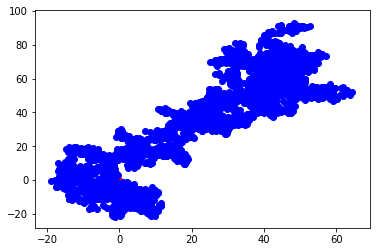

In [43]:
#1a. Suppose that an ant wandered randomly by taking steps (x,y), one per second, where at each ant step, x and y 
#come from a normal distribution with a mean of 0 and a standard deviation of 1.0mm (assume this for all questions below). 
#Plot a trace of the ant’s path over the course of an hour.
x=0
y=0
plt.scatter(0,0, color='red')
for i in range(1,3600): #3600s for an hour
    right=np.random.normal(0,1,1)
    up=np.random.normal(0,1,1)
    x+=right
    y+=up
    plt.scatter(x,y,color='blue')

plt.show()





In [13]:
#1b.Let’s think about why ants need to perform path integration. Suppose that instead of path integration, when an ant found food, it just continued to wander with random steps until it got back to the nest. Using a simulation, find the probability that an ant who finds food after 1 hour will make its way back to within 10mm of the nest over the course of the next hour (note that if it comes within 10mm of a nest, it stops). 
#Is this a good strategy? Why or why not?
#denote start point as (0,0), record food location. keep wanfering, check if currnet location is within (-10,10) in both x and y directions. 
def homerun1():
    x=0
    y=0
    for i in range(1,3601): #left include right exclude
        right=np.random.normal(0,1,1)
        up=np.random.normal(0,1,1)
        x+=right#one step in x direction
        y+=up#one step in y direction. x,y denotes food location
    time_back=1
    while(time_back<=3600):
        right=np.random.normal(0,1,1)
        up=np.random.normal(0,1,1)
        x+=right
        y+=up
        if x**2+y**2 < 100:
            return True
        else:
            time_back+=1      

count=0
for i in range(1,1001):
    if homerun1()==True:
        count+=1

prob=count/1000
print(prob)

#no,this is not a good strategy, because the probability of returning to within a range of the nest with food is pretty low. 

0.205


In [49]:
#1c. what is the random closest distance to the nest?
min_dis=[]
for i in range(1,1001):
    for j in range(1,3601): #left include right exclude
        x=0
        y=0
        right=np.random.normal(0,1,1)
        up=np.random.normal(0,1,1)
        x+=right
        y+=up
    distance=[]
    for k in range (1,3601):
        right=np.random.normal(0,1,1)
        up=np.random.normal(0,1,1)
        x+=right
        y+=up
        distance.append(sqrt(x**2+y**2))
    min_dis.append(min(distance))


avg=np.mean(min_dis)
avg

    

0.7452743539145392

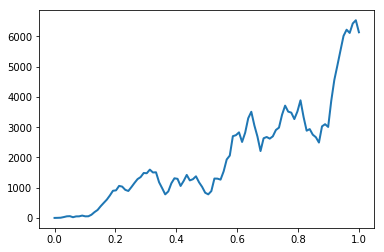

In [59]:
#2. show a range of s values to show what is going on. First we use a fixed S as the noise.  Using x to record step size, X to record accumulative steps. 
X=0
Y=0
x=0
y=0
mean_dis=[]
for s in range(1, 10001, 100):
    s = s*10**(-4)
    distance=[]
    for i in range(1,101) :
        for j in range(1,3601): 
            right=np.random.normal(0,1,1)
            up=np.random.normal(0,1,1)
            ex=np.random.normal(0,s,1)
            ey=np.random.normal(0,s,1)
            x+=right #actual location
            X=X+right+ex #memorizede location
            y+=up 
            Y=Y+up+ey
        distance.append(sqrt((X-x)**2+(Y-y)**2))
    mean_dis.append(np.mean(distance))

    
mean_dis

x=np.linspace(0.0001,1,100)
y=mean_dis
plt.plot(x, y, linewidth=2.0)
plt.show()
#conclusion: as s becomes greater, the mean distance from the ants to the nest becomes greater. They are positively related to each other. 


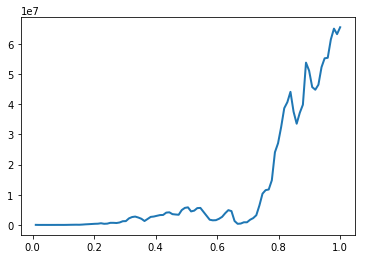

In [60]:
#3a.
X=0
Y=0
x=0
y=0
mean_dis=[]
mean_energy=[]
for s in range(1, 10001, 100):
    s = s*10**(-4)
    distance=[]
    energy=[]
    for i in range(1,101) :
        for j in range(1,3601): 
            right=np.random.normal(0,1,1)
            up=np.random.normal(0,1,1)
            ex=np.random.normal(0,s,1)
            ey=np.random.normal(0,s,1)
            x+=right #actual location
            X=X+right+ex #memorizede location
            y+=up 
            Y=Y+up+ey
        distance.append(sqrt((X-x)**2+(Y-y)**2))
        energy.append(((X-x)**2+(Y-y)**2)+np.exp(0.1/s))
    mean_dis.append(np.mean(distance))
    mean_energy.append(np.mean(energy))

    
mean_energy
x=np.linspace(0.0001,1,100)
y=mean_energy
plt.plot(x, y, linewidth=2.0)
plt.show()
#conclusion: the minimum acheives at when s is relatively small but not the smallest. 






In [ ]:
#3b.
#Evolutionary significance
#Supposing that s1 is the sd which acheives minimum energy consumption. And suppose that ants might have different s values. The ants who have s=s1
#will acheive minimal energy consumption while searching food, thus have a higher chance of survival. Evolutionaryly, these ants with s1 will give birth to more 
#offsprings. In the long run, in the ant colony, number of ants with s1 as their food search standard deviation will become more and more. In other words, ants colony
#will evolve into the direction that acheives minimum energy consumption( food searcd standard deviation =s1)


